
# Outlier detection with Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection
method which computes the local density deviation of a given data point with
respect to its neighbors. It considers as outliers the samples that have a
substantially lower density than their neighbors. This example shows how to use
LOF for outlier detection which is the default use case of this estimator in
scikit-learn. Note that when LOF is used for outlier detection it has no
`predict`, `decision_function` and `score_samples` methods. See the `User
Guide <outlier_detection>` for details on the difference between outlier
detection and novelty detection and how to use LOF for novelty detection.

The number of neighbors considered (parameter `n_neighbors`) is typically set 1)
greater than the minimum number of samples a cluster has to contain, so that
other samples can be local outliers relative to this cluster, and 2) smaller
than the maximum number of close by samples that can potentially be local
outliers. In practice, such information is generally not available, and taking
`n_neighbors=20` appears to work well in general.


## Generate data with outliers



In [1]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_sideliers = np.random.uniform(low=-303, high=2, size=(20, 2))
X_backliers = 0.3 * np.random.randn(0, 1)
X_backliers = np.r_[X_inliers, X_inliers]
X = np.r_[np.r_[X_inliers, X_outliers, X_sideliers, X_backliers]]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [2]:
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       ...,
       [-1.94804572, -1.88440479],
       [-2.26515723, -1.95388247],
       [-1.98253738, -2.34289109]])

## Fit the model for outlier detection (default)

Use `fit_predict` to compute the predicted labels of the training samples
(when LOF is used for outlier detection, the estimator has no `predict`,
`decision_function` and `score_samples` methods).



In [3]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

## Plot results



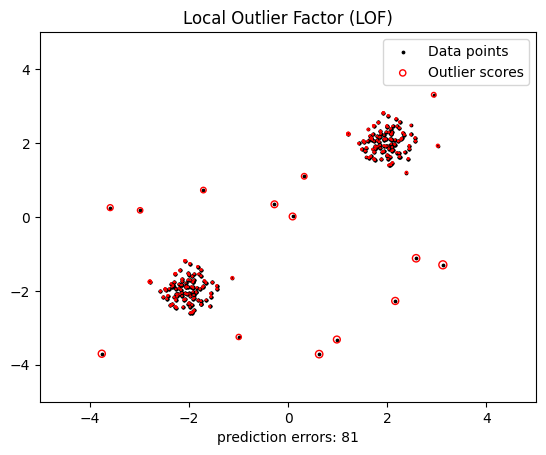

In [4]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()